In [4]:
!pip install pandas_datareader


In [5]:
import pandas_datareader as pdr
key="f3c30311d41408bbe206b733db2144d70af5eac7"
ticker='JNJ'

In [6]:
df = pdr.get_data_tiingo(ticker, api_key=key)

D:\python\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [7]:
filename=ticker+'.csv'
df.to_csv(filename)


In [8]:
import pandas as pd

In [9]:
df=pd.read_csv(filename)

In [10]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,JNJ,2019-01-08 00:00:00+00:00,129.96,130.50,127.73,128.18,9351570,113.519630,113.991318,111.571732,111.964805,9351570,0.0,1.0
1,JNJ,2019-01-09 00:00:00+00:00,128.93,130.24,128.33,129.83,7403525,112.619928,113.764209,112.095830,113.406075,7403525,0.0,1.0
2,JNJ,2019-01-10 00:00:00+00:00,129.71,129.89,127.69,127.69,6224419,113.301255,113.458485,111.536792,111.536792,6224419,0.0,1.0
3,JNJ,2019-01-11 00:00:00+00:00,129.75,129.84,128.31,129.00,5300666,113.336195,113.414810,112.078360,112.681073,5300666,0.0,1.0
4,JNJ,2019-01-14 00:00:00+00:00,128.28,128.96,127.59,128.74,7374457,112.052155,112.646133,111.449442,112.453964,7374457,0.0,1.0


In [11]:
df1=df.reset_index()['adjClose']

In [12]:
df1

0       113.519630
1       112.619928
2       113.301255
3       113.336195
4       112.052155
           ...    
1253    156.740000
1254    159.970000
1255    160.970000
1256    160.630000
1257    161.130000
Name: adjClose, Length: 1258, dtype: float64

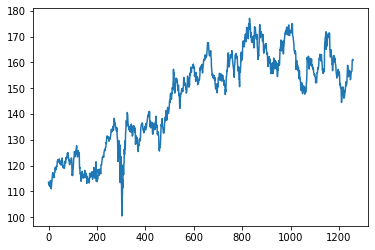

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [14]:
import numpy as np

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1

array([[0.17039421],
       [0.15865707],
       [0.16754539],
       ...,
       [0.78941243],
       [0.78497693],
       [0.79149973]])

In [17]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [18]:
training_size,test_size

(817, 441)

In [19]:
train_data


array([[0.17039421],
       [0.15865707],
       [0.16754539],
       [0.1680012 ],
       [0.15125014],
       [0.16355704],
       [0.14851527],
       [0.16048032],
       [0.17871277],
       [0.15717568],
       [0.15717568],
       [0.13700603],
       [0.15068037],
       [0.15934079],
       [0.17461047],
       [0.18953829],
       [0.20594749],
       [0.21871021],
       [0.20366844],
       [0.20366844],
       [0.20503587],
       [0.19421035],
       [0.1981987 ],
       [0.19364059],
       [0.2182544 ],
       [0.22155903],
       [0.21996369],
       [0.24355192],
       [0.23568918],
       [0.24321007],
       [0.23261245],
       [0.24605889],
       [0.25175653],
       [0.25072417],
       [0.24797123],
       [0.25680358],
       [0.27641828],
       [0.27790945],
       [0.28123592],
       [0.28490651],
       [0.27515651],
       [0.27309181],
       [0.2788271 ],
       [0.28593886],
       [0.28857709],
       [0.27263299],
       [0.26781534],
       [0.262

In [20]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)



In [21]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [22]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [23]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [24]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 32s 876ms/step - loss: 0.0779 - val_loss: 0.0321
Epoch 2/100
12/12 [==============================] - 5s 400ms/step - loss: 0.0163 - val_loss: 0.0055
Epoch 3/100
12/12 [==============================] - 4s 338ms/step - loss: 0.0092 - val_loss: 0.0123
Epoch 4/100
12/12 [==============================] - 4s 378ms/step - loss: 0.0055 - val_loss: 0.0039
Epoch 5/100
12/12 [==============================] - 5s 397ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 6/100
12/12 [==============================] - 5s 412ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 7/100
12/12 [==============================] - 5s 411ms/step - loss: 0.0039 - val_loss: 0.0038
Epoch 8/100
12/12 [==============================] - 5s 409ms/step - loss: 0.0036 - val_loss: 0.0039
Epoch 9/100
12/12 [==============================] - 5s 432ms/step - loss: 0.0036 - val_loss: 0.0040
Epoch 10/100
12/12 [==============================] - 5s 445ms/step - loss: 0.0036 - val_l

12/12 [==============================] - 5s 390ms/step - loss: 0.0010 - val_loss: 8.4402e-04
Epoch 82/100
12/12 [==============================] - 5s 396ms/step - loss: 0.0011 - val_loss: 0.0024
Epoch 83/100
12/12 [==============================] - 5s 402ms/step - loss: 0.0012 - val_loss: 8.3627e-04
Epoch 84/100
12/12 [==============================] - 5s 398ms/step - loss: 9.9850e-04 - val_loss: 9.4055e-04
Epoch 85/100
12/12 [==============================] - 5s 396ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 86/100
12/12 [==============================] - 5s 394ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 87/100
12/12 [==============================] - 5s 396ms/step - loss: 9.5872e-04 - val_loss: 8.6110e-04
Epoch 88/100
12/12 [==============================] - 5s 385ms/step - loss: 9.5848e-04 - val_loss: 8.1295e-04
Epoch 89/100
12/12 [==============================] - 5s 403ms/step - loss: 9.5818e-04 - val_loss: 9.7379e-04
Epoch 90/100
12/12 [==============================] - 5

In [29]:
import tensorflow as tf

In [30]:
tf.__version__

'2.11.0'

In [31]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 74ms/step


In [32]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [33]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

139.68264265401035

In [34]:
math.sqrt(mean_squared_error(ytest,test_predict))

157.61069171959494

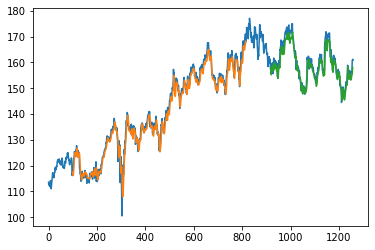

In [35]:
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

441

In [37]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape

(1, 101)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
temp_input

[0.9183175683162021,
 0.911892135205012,
 0.9048241587823118,
 0.9256425620635067,
 0.906109245404028,
 0.8400557930199,
 0.8229641409428563,
 0.8038163502715885,
 0.8110128353565904,
 0.8412123709793136,
 0.8158443822931414,
 0.8161032393216163,
 0.80859638552585,
 0.7820635402174112,
 0.7665321185728424,
 0.7691206888458502,
 0.7345632756873042,
 0.7607078354562922,
 0.7675675466815237,
 0.7947475345604977,
 0.806654957820768,
 0.8119615268829774,
 0.8087258140394353,
 0.7790866844023436,
 0.7922883927997701,
 0.7887938229290574,
 0.7979832474027355,
 0.7818046831889367,
 0.7667909756000126,
 0.7636846912713602,
 0.7476355555711462,
 0.7229147094542041,
 0.7199378536391365,
 0.7053124315896637,
 0.6975467207680319,
 0.7000058625287586,
 0.7023355757745962,
 0.7233029949949596,
 0.7297744206807399,
 0.7414229869138405,
 0.7390932736666986,
 0.7108778576790438,
 0.71281928538543,
 0.719549568098381,
 0.7283507070299988,
 0.7097130010567771,
 0.6662250204517239,
 0.6609184513895143,
 0.

In [39]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.91189214 0.90482416 0.92564256 0.90610925 0.84005579 0.82296414
 0.80381635 0.81101284 0.84121237 0.81584438 0.81610324 0.80859639
 0.78206354 0.76653212 0.76912069 0.73456328 0.76070784 0.76756755
 0.79474753 0.80665496 0.81196153 0.80872581 0.77908668 0.79228839
 0.78879382 0.79798325 0.78180468 0.76679098 0.76368469 0.74763556
 0.72291471 0.71993785 0.70531243 0.69754672 0.70000586 0.70233558
 0.72330299 0.72977442 0.74142299 0.73909327 0.71087786 0.71281929
 0.71954957 0.72835071 0.709713   0.66622502 0.66091845 0.66971959
 0.6488816  0.64681074 0.65121131 0.61794818 0.57394249 0.59245077
 0.6094059  0.6139359  0.63399732 0.64823446 0.65289388 0.6425396
 0.63542103 0.59749848 0.59529819 0.60021648 0.60060476 0.61535961
 0.63218532 0.62817304 0.64512817 0.66091334 0.65699966 0.67891626
 0.66300064 0.66756659 0.67382848 0.70709474 0.75562435 0.76214714
 0.7578421  0.7326641  0.71674848 0.7039638  0.71231298 0.71244343
 0.72183626 0.7359255  0.71361754 0.7172703  0.7305

7 day output [[0.69371855]]
8 day input [0.84121237 0.81584438 0.81610324 0.80859639 0.78206354 0.76653212
 0.76912069 0.73456328 0.76070784 0.76756755 0.79474753 0.80665496
 0.81196153 0.80872581 0.77908668 0.79228839 0.78879382 0.79798325
 0.78180468 0.76679098 0.76368469 0.74763556 0.72291471 0.71993785
 0.70531243 0.69754672 0.70000586 0.70233558 0.72330299 0.72977442
 0.74142299 0.73909327 0.71087786 0.71281929 0.71954957 0.72835071
 0.709713   0.66622502 0.66091845 0.66971959 0.6488816  0.64681074
 0.65121131 0.61794818 0.57394249 0.59245077 0.6094059  0.6139359
 0.63399732 0.64823446 0.65289388 0.6425396  0.63542103 0.59749848
 0.59529819 0.60021648 0.60060476 0.61535961 0.63218532 0.62817304
 0.64512817 0.66091334 0.65699966 0.67891626 0.66300064 0.66756659
 0.67382848 0.70709474 0.75562435 0.76214714 0.7578421  0.7326641
 0.71674848 0.7039638  0.71231298 0.71244343 0.72183626 0.7359255
 0.71361754 0.7172703  0.73057681 0.68896137 0.70944295 0.71753121
 0.72640222 0.72914179 0.

15 day output [[0.62221634]]
16 day input [0.76070784 0.76756755 0.79474753 0.80665496 0.81196153 0.80872581
 0.77908668 0.79228839 0.78879382 0.79798325 0.78180468 0.76679098
 0.76368469 0.74763556 0.72291471 0.71993785 0.70531243 0.69754672
 0.70000586 0.70233558 0.72330299 0.72977442 0.74142299 0.73909327
 0.71087786 0.71281929 0.71954957 0.72835071 0.709713   0.66622502
 0.66091845 0.66971959 0.6488816  0.64681074 0.65121131 0.61794818
 0.57394249 0.59245077 0.6094059  0.6139359  0.63399732 0.64823446
 0.65289388 0.6425396  0.63542103 0.59749848 0.59529819 0.60021648
 0.60060476 0.61535961 0.63218532 0.62817304 0.64512817 0.66091334
 0.65699966 0.67891626 0.66300064 0.66756659 0.67382848 0.70709474
 0.75562435 0.76214714 0.7578421  0.7326641  0.71674848 0.7039638
 0.71231298 0.71244343 0.72183626 0.7359255  0.71361754 0.7172703
 0.73057681 0.68896137 0.70944295 0.71753121 0.72640222 0.72914179
 0.73214228 0.73422957 0.77636684 0.78941243 0.78497693 0.79149973
 0.77080673 0.76288098

 0.5903008  0.58340925 0.57703131 0.57118058]
23 day output [[0.5658581]]
24 day input [0.78879382 0.79798325 0.78180468 0.76679098 0.76368469 0.74763556
 0.72291471 0.71993785 0.70531243 0.69754672 0.70000586 0.70233558
 0.72330299 0.72977442 0.74142299 0.73909327 0.71087786 0.71281929
 0.71954957 0.72835071 0.709713   0.66622502 0.66091845 0.66971959
 0.6488816  0.64681074 0.65121131 0.61794818 0.57394249 0.59245077
 0.6094059  0.6139359  0.63399732 0.64823446 0.65289388 0.6425396
 0.63542103 0.59749848 0.59529819 0.60021648 0.60060476 0.61535961
 0.63218532 0.62817304 0.64512817 0.66091334 0.65699966 0.67891626
 0.66300064 0.66756659 0.67382848 0.70709474 0.75562435 0.76214714
 0.7578421  0.7326641  0.71674848 0.7039638  0.71231298 0.71244343
 0.72183626 0.7359255  0.71361754 0.7172703  0.73057681 0.68896137
 0.70944295 0.71753121 0.72640222 0.72914179 0.73214228 0.73422957
 0.77636684 0.78941243 0.78497693 0.79149973 0.77080673 0.76288098
 0.74936426 0.73565084 0.7235058  0.7128140

In [40]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [41]:
len(df1)

1258

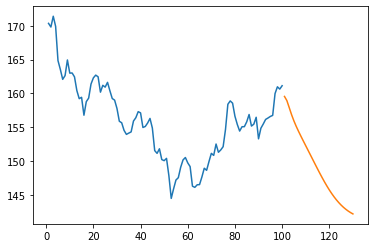

In [42]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [43]:
print(df1[1158:].flatten())
print(day_new)
print(np.array(lst_output).flatten())
print(day_pred)

[0.91189214 0.90482416 0.92564256 0.90610925 0.84005579 0.82296414
 0.80381635 0.81101284 0.84121237 0.81584438 0.81610324 0.80859639
 0.78206354 0.76653212 0.76912069 0.73456328 0.76070784 0.76756755
 0.79474753 0.80665496 0.81196153 0.80872581 0.77908668 0.79228839
 0.78879382 0.79798325 0.78180468 0.76679098 0.76368469 0.74763556
 0.72291471 0.71993785 0.70531243 0.69754672 0.70000586 0.70233558
 0.72330299 0.72977442 0.74142299 0.73909327 0.71087786 0.71281929
 0.71954957 0.72835071 0.709713   0.66622502 0.66091845 0.66971959
 0.6488816  0.64681074 0.65121131 0.61794818 0.57394249 0.59245077
 0.6094059  0.6139359  0.63399732 0.64823446 0.65289388 0.6425396
 0.63542103 0.59749848 0.59529819 0.60021648 0.60060476 0.61535961
 0.63218532 0.62817304 0.64512817 0.66091334 0.65699966 0.67891626
 0.66300064 0.66756659 0.67382848 0.70709474 0.75562435 0.76214714
 0.7578421  0.7326641  0.71674848 0.7039638  0.71231298 0.71244343
 0.72183626 0.7359255  0.71361754 0.7172703  0.73057681 0.68896

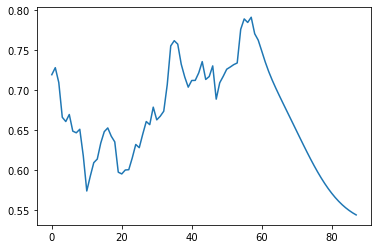

In [44]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [45]:
df3=scaler.inverse_transform(df3).tolist()

In [46]:
data=pd.DataFrame(np.array(df3[1200:])).to_csv("data.csv")

In [47]:
df=pd.read_csv("data.csv")

In [48]:
df.to_json(orient='values')

'[[0,155.6147154203],[1,156.2893600265],[2,154.8607008604],[3,151.5271628061],[4,151.1203917935],[5,151.7950363997],[6,150.1977160821],[7,150.0389761747],[8,150.3762984778],[9,147.8265387161],[10,144.453315685],[11,145.8720536069],[12,147.1717365983],[13,147.5189801456],[14,149.056772998],[15,150.148109861],[16,150.5052746525],[17,149.7115751158],[18,149.1659066843],[19,146.258982131],[20,146.0903209795],[21,146.4673282594],[22,146.4970919921],[23,147.6281138319],[24,148.9178755791],[25,148.6103170086],[26,149.91],[27,151.12],[28,150.82],[29,152.5],[30,151.28],[31,151.63],[32,152.11],[33,154.66],[34,158.38],[35,158.88],[36,158.55],[37,156.62],[38,155.4],[39,154.42],[40,155.06],[41,155.07],[42,155.79],[43,156.87],[44,155.16],[45,155.44],[46,156.46],[47,153.27],[48,154.84],[49,155.46],[50,156.14],[51,156.35],[52,156.58],[53,156.74],[54,159.97],[55,160.97],[56,160.63],[57,161.13],[58,159.5437941379],[59,158.936251894],[60,157.9001376951],[61,156.8489459655],[62,155.9179769825],[63,155.098

In [49]:
df3=scaler.inverse_transform(df3).tolist()

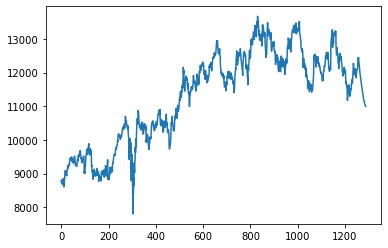

In [50]:
plt.plot(df3)